

# Track 01 - The Perceptron

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
print(tf.__version__)

2.4.1


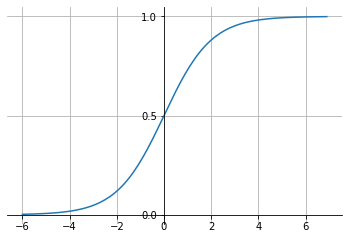

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

values =  tf.range(-6,7,0.1,dtype=tf.float32)
sigmoid_values = tf.math.sigmoid(values)

ax.plot(values.numpy(),sigmoid_values.numpy())
ax.grid(True)

ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')

ax.set_yticks([0,0.5,1])
plt.savefig('sigmoid.png', transparent=True)

plt.show()

In [ ]:
values =  tf.range(-6,7,0.1,dtype=tf.float32)

with tf.GradientTape() as tape:
  tape.watch(values)  # Start recording the history of operations applied to 'values'
  sigmoid_values = tf.math.sigmoid(values)

  # What's the gradient of 'sigmoid_values' with respect to `values`?
  derivative_sigmoid = tape.gradient(sigmoid_values, values)
  print(derivative_sigmoid)

tf.Tensor(
[0.00246653 0.00272446 0.00300933 0.00332364 0.00367068 0.00405357
 0.00447606 0.00494213 0.00545618 0.00602305 0.00664806 0.00733688
 0.00809593 0.00893206 0.00985276 0.01086621 0.01198134 0.01320767
 0.01455578 0.01603667 0.01766268 0.01944663 0.02140246 0.02354484
 0.02588954 0.02845296 0.03125238 0.03430577 0.03763167 0.0412489
 0.04517655 0.04943341 0.05403795 0.05900755 0.06435811 0.07010349
 0.07625479 0.08281932 0.0898001  0.09719443 0.10499328 0.11317995
 0.121729   0.13060541 0.13976344 0.14914608 0.15868455 0.16829802
 0.1778941  0.18736954 0.19661161 0.2055     0.21390942 0.22171262
 0.22878401 0.23500352 0.24026059 0.24445817 0.24751648 0.24937601
 0.24999999 0.24937609 0.24751666 0.24445844 0.24026091 0.23500393
 0.22878447 0.22171313 0.21390998 0.20550059 0.19661225 0.18737023
 0.17789477 0.16829868 0.15868519 0.14914678 0.13976412 0.13060603
 0.12172964 0.11318053 0.10499385 0.09719494 0.08980054 0.08281978
 0.07625518 0.07010397 0.0643585  0.05900789 0.05403

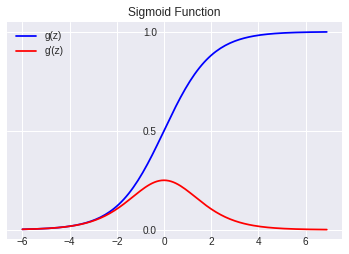

In [ ]:
plt.style.use("seaborn")

fig, ax = plt.subplots(1,1,figsize=(6,4))

values =  tf.range(-6,7,0.1,dtype=tf.float32)

# chance the activation function here: tf.math
sigmoid_values = tf.math.sigmoid(values)

ax.plot(values.numpy(),sigmoid_values.numpy(),color="blue")
ax.plot(values.numpy(),derivative_sigmoid.numpy(),color="red")

ax.grid(True)

ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')

ax.set_yticks([0,0.5,1])

ax.legend(["g(z)","g'(z)"])
ax.set_title("Sigmoid Function")
plt.savefig('derivatesigmoid.png', transparent=True)

In [ ]:
def derivate(function, values):
  """Calculate the derivate of each point in 'values'
     related to 'function'.

    Args:
      function: pointer to a function which is desired to derivate
      values: tensor of points to be derivated

    Returns:
      Derivate of 'function' which dimension is similar to 'values''

    """
  with tf.GradientTape() as tape:
    tape.watch(values)
    funct_values = function(values)

    derivate_function = tape.gradient(funct_values,values)
  return derivate_function  

In [ ]:
derivate(tf.math.sigmoid,tf.range(-6,7,1,dtype=tf.float32))

<tf.Tensor: shape=(13,), dtype=float32, numpy=
array([0.00246653, 0.00664812, 0.01766273, 0.04517666, 0.10499357,
       0.19661194, 0.25      , 0.19661193, 0.10499357, 0.04517666,
       0.01766273, 0.00664809, 0.00246653], dtype=float32)>

In [ ]:
derivate(tf.math.tanh,tf.range(-6,7,1,dtype=tf.float32))

<tf.Tensor: shape=(13,), dtype=float32, numpy=
array([2.4795379e-05, 1.8166671e-04, 1.3411314e-03, 9.8661007e-03,
       7.0650816e-02, 4.1997430e-01, 1.0000000e+00, 4.1997430e-01,
       7.0650816e-02, 9.8661007e-03, 1.3411314e-03, 1.8166671e-04,
       2.4795379e-05], dtype=float32)>

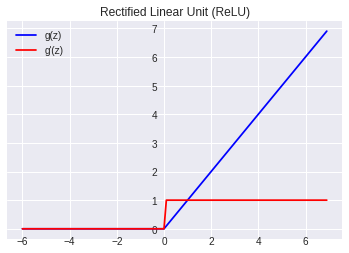

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

funct = tf.nn.relu
name = "Rectified Linear Unit (ReLU)"

values =  tf.range(-6,7,0.1,dtype=tf.float32)
f_values = funct(values)

ax.plot(values.numpy(),f_values.numpy(),color="blue")
ax.plot(values.numpy(),derivate(funct,values).numpy(),color="red")

ax.grid(True)

ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')

ax.legend(["g(z)","g'(z)"], fancybox=True, framealpha=0.5)
ax.set_title(name)
plt.savefig(name + '.png', transparent=True)

In [ ]:
#plt.style.available

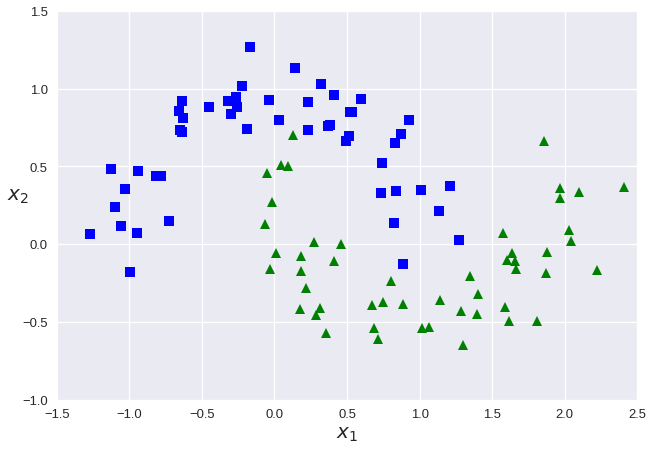

In [ ]:
from sklearn.datasets import make_moons

plt.style.use("seaborn-talk")

name = "activation_function"

x, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(x, y, axes):
    plt.plot(x[:, 0][y==0], x[:, 1][y==0], "bs")
    plt.plot(x[:, 0][y==1], x[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])

plt.savefig(name + '.png', transparent=True,dpi=300,bbox_inches = "tight")
plt.show()

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(x, y)

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    #plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

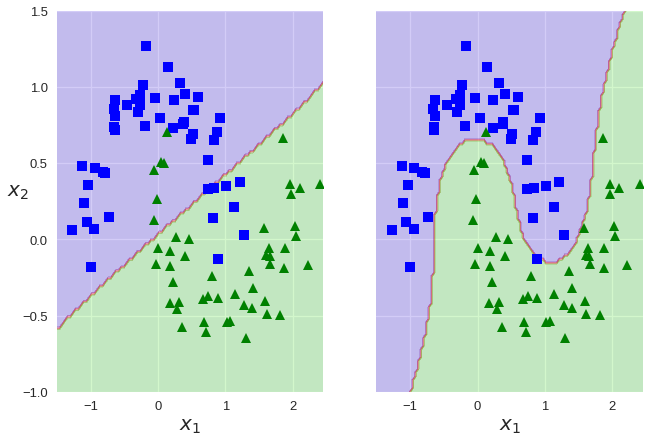

In [ ]:
from sklearn.svm import SVC

name = "two_activation"

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2)#, (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(x, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(x, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    #plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i==1:
        #plt.xlabel("")
        plt.ylabel("")

plt.savefig(name + '.png', transparent=True,dpi=300,bbox_inches = "tight")
plt.show()

In [ ]:
w = tf.Variable([[3],
                 [-2]],shape=(2,1),dtype=tf.float32)
bias = tf.Variable(1, dtype=tf.float32)
x = tf.Variable([[-1],
                 [2]],shape=(2,1),dtype=tf.float32)

tf.matmul(tf.transpose(x),w) + bias

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-6.]], dtype=float32)>

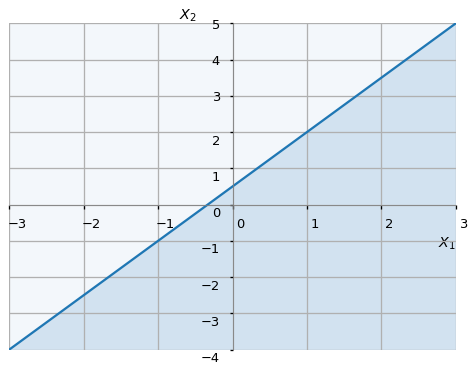

In [38]:
import types
import matplotlib
plt.style.use("seaborn-talk")


def linear_2d(x1):
  return (1 + 3*x1)/2

fig, ax = plt.subplots(1,1,figsize=(8,6))

x = tf.range(-3,4).numpy()
y = linear_2d(x)

ax.grid(True)

ax.spines['left'].set_position('zero')
ax.spines['left'].set_color('gray')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
#ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_color('gray')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')

ax.set_ylabel(r"$X_2$",horizontalalignment='right',y=1.0,rotation=0)
ax.set_xlabel(r"$X_1$",horizontalalignment='right',x=1.0)
ax.plot(x,y)

ax.tick_params(axis='x', which='major', pad=10)

SHIFT = -0.1 # Data coordinates
for label in ax.xaxis.get_majorticklabels():
    label.customShiftValue = SHIFT
    label.set_x = types.MethodType( lambda self, x: matplotlib.text.Text.set_x(self, x-self.customShiftValue ), 
                                    label)

SHIFT = 0.2
for label in ax.yaxis.get_majorticklabels():
    label.customShiftValue = SHIFT
    label.set_y = types.MethodType( lambda self, y: matplotlib.text.Text.set_y(self, y-self.customShiftValue ), 
                                    label)

X, Y = np.meshgrid(x, y)

iu1 = np.triu_indices(7)
iu2 = np.tril_indices(7)
idiag = np.diag_indices(7)

Z = np.zeros((7,7))
Z[iu1] = 1
Z[iu2] = -1
Z[idiag] = 0

ax.contourf(X,Y,Z,cmap=plt.cm.Blues, alpha=0.2,levels=1)
plt.savefig("twoclasses" + '.png', transparent=True,dpi=300,bbox_inches = "tight")
plt.show()

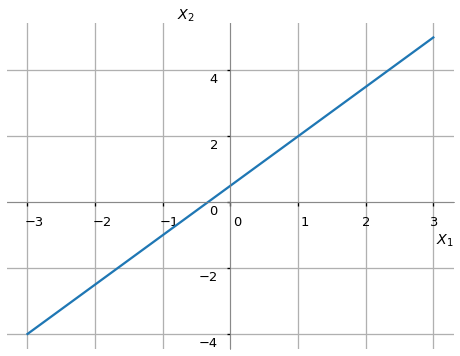

In [34]:
import types
import matplotlib.pyplot as plt

plt.style.use("seaborn-talk")

def linear_2d(x1):
  return (1 + 3*x1)/2

fig, ax = plt.subplots(1,1,figsize=(8,6))

x = tf.range(-3,4).numpy()
y = linear_2d(x)

ax.grid(True)

ax.spines['left'].set_position('zero')
ax.spines['left'].set_color('gray')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
#ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_color('gray')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')

ax.set_ylabel(r"$X_2$",horizontalalignment='right',y=1.0,rotation=0)
ax.set_xlabel(r"$X_1$",horizontalalignment='right',x=1.0)

SHIFT = -0.1 # Data coordinates
for label in ax.xaxis.get_majorticklabels():
    label.customShiftValue = SHIFT
    label.set_x = types.MethodType( lambda self, x: matplotlib.text.Text.set_x(self, x-self.customShiftValue ), 
                                    label)
    
SHIFT = 0.2
for label in ax.yaxis.get_majorticklabels():
    label.customShiftValue = SHIFT
    label.set_y = types.MethodType( lambda self, y: matplotlib.text.Text.set_y(self, y-self.customShiftValue ), 
                                    label)

ax.plot(x,y)
plt.savefig("line" + '.png', transparent=True,dpi=300,bbox_inches = "tight")

In [37]:
tf.math.sigmoid(-9.0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.00012338161>

# 3.0 Keras

In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self, units=32):
    super(MyDenseLayer, self).__init__()
    self.units = units

  def build(self, input_shape):
    input_dim = int(input_shape[-1])
    # Initialize weights and bias
    self.W = self.add_weight("weight", 
                             shape=[input_dim,self.units], 
                             initializer='random_normal')
    self.b = self.add_weight("bias",
                             shape=[1,self.units],
                             initializer='zeros') 

  def call(self, x):
    # Forward propagation
    z = tf.matmul(x,self.W) + self.b 

    # Feed through a non-linear activation
    y = tf.sigmoid(z)
  
    return y

# Since layer parameters are initialized randomly, we will set a random seed for reproducibility
tf.random.set_seed(1)

# The layer has three hidden units or three neurons
layer = MyDenseLayer(3)

# One instance with two features
x_input = tf.ones((1,2))

# 'build' >> 'call' 
y = layer(x_input)

# test the output!
print(y.numpy())

[[0.47525924 0.5040134  0.4925321 ]]


In [ ]:
import tensorflow as tf

layer = tf.keras.layers.Dense(units=2, activation="sigmoid")

In [ ]:
layer

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.nn.sigmoid),
  tf.keras.layers.Dense(4, activation=tf.nn.sigmoid),
  tf.keras.layers.Dense(2)
])

In [ ]:
y = tf.constant([0,1,0,0])
predicted = tf.constant([0.2,0.8,0.3,0.3])

In [ ]:
loss = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(y, predicted) )

In [ ]:
loss

<tf.Tensor: shape=(), dtype=float32, numpy=1.0159091>

In [ ]:
import tensorflow as tf

tf.keras.optimizers.SGD

tf.keras.optimizers.Adam

tf.keras.optimizers.Adadelta

tf.keras.optimizers.Adagrad

tf.keras.optimizers.RMSprop


# 4.0 Putting it all together

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py
import time

## Utils functions

In [ ]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((train_set_y_orig.shape[0],1))
    test_set_y_orig = test_set_y_orig.reshape((test_set_y_orig.shape[0],1))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

## Load Dataset

In [ ]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [ ]:
# Reshape the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1)

# Standardize the dataset
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [ ]:
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x  shape: " + str(test_set_x.shape))
print ("test_set_y  shape: " + str(test_set_y.shape))

train_set_x shape: (209, 12288)
train_set_y shape: (209, 1)
test_set_x  shape: (50, 12288)
test_set_y  shape: (50, 1)


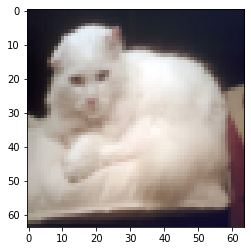

In [ ]:
index = 13
plt.imshow(train_set_x_orig[index])

## Model

In [ ]:
# Create a source dataset from your training data
dataset = tf.data.Dataset.from_tensor_slices((train_set_x,train_set_y))
dataset = dataset.shuffle(buffer_size=64).batch(32)

# Instantiate a simple classification model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation=tf.nn.relu, dtype='float64'),
  tf.keras.layers.Dense(8, activation=tf.nn.relu, dtype='float64'),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid, dtype='float64')
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.BinaryCrossentropy()

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.BinaryAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

In [ ]:
for i in range(500):    
    # Iterate over the batches of the dataset.
    for step, (x, y) in enumerate(dataset):
      # Open a GradientTape.
      with tf.GradientTape() as tape:

        # Forward pass.
        logits = model(x)

        # Loss value for this batch.
        loss_value = loss(y, logits)
          
      # Get gradients of loss wrt the weights.
      gradients = tape.gradient(loss_value, model.trainable_weights)

      # Update the weights of our linear layer.
      optimizer.apply_gradients(zip(gradients, model.trainable_weights))

      # Update the running accuracy.
      accuracy.update_state(y, logits)

    # Logging.
    if i % 100 == 0:
      print('i:', i)
      print('Loss from last step: %.3f' % loss_value)
      print('Total running accuracy so far: %.3f' % accuracy.result())

i: 0
Loss from last step: 0.717
Total running accuracy so far: 0.660
i: 100
Loss from last step: 0.484
Total running accuracy so far: 0.723
i: 200
Loss from last step: 0.362
Total running accuracy so far: 0.788
i: 300
Loss from last step: 0.252
Total running accuracy so far: 0.839
i: 400
Loss from last step: 0.080
Total running accuracy so far: 0.874


In [ ]:
# Create a source dataset from your test data
test_dataset = tf.data.Dataset.from_tensor_slices((test_set_x, test_set_y))
test_dataset = test_dataset.batch(32)

# This clears the internal state of the metric
accuracy.reset_states()  

for step, (x, y) in enumerate(test_dataset):
  logits = model(x)
  accuracy.update_state(y, logits)

print('Final test accuracy: %.3f' % accuracy.result())

Final test accuracy: 0.760


# 5.0 Practical aspects of DL

In [ ]:
import tensorflow as tf
import numpy as np

tf.random.set_seed(0)
layer = tf.keras.layers.Dropout(.2, input_shape=(2,))
data = np.arange(10).reshape(5, 2).astype(np.float32)
print(data)

[[0. 1.]
 [2. 3.]
 [4. 5.]
 [6. 7.]
 [8. 9.]]


In [ ]:
outputs = layer(data, training=True)
print(outputs)

tf.Tensor(
[[ 0.    1.25]
 [ 2.5   3.75]
 [ 5.    6.25]
 [ 7.5   8.75]
 [10.    0.  ]], shape=(5, 2), dtype=float32)
